In [77]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv('boston_house_prices.csv')

<b>Explanation of Features</b>
* CRIM: per capita crime rate per town (assumption: if CRIM high, target small)
* ZN: proportion of residential land zoned for lots over 25,000 sq. ft (assumption: if ZN high, target big)
* INDUS: proportion of non-retail business acres per town (assumption: if INDUS high, target small)
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (categorical! assumption: if 1, target high)
* NOX:  nitrogen oxides concentration (parts per 10 million) (assumption: if NOX high, target small)
* RM: average number of rooms per dwelling.(assumption: if RM high, target big)
* AGE: proportion of owner-occupied units built prior to 1940. (assumption: if AGE high, target big)
* DIS: weighted mean of distances to five Boston employment centres. (assumption: if DIS high, target small)
* RAD: index of accessibility to radial highways. (assumption: if RAD high, target big)
* TAX: full-value property-tax rate per \$10,000. (assumption: if TAX high, target big)
* PTRATIO: pupil-teacher ratio by town. (assumption: if PTRATIO high, target big)
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. (assumption: if B high, target small)
* LSTAT: lower status of the population (percent). (assumption: if LSTAT high, target small)
* MEDV: median value of owner-occupied homes in \$1000s. (target)



In [79]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [80]:
#get number of rows and columns
df.shape

(506, 14)

In [81]:
#get overview of dataset values
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [83]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

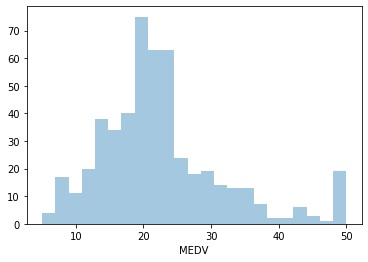

In [84]:
#check distribution of target variable
#looks like normal distribution, no need to do logarithm
sns.distplot(df.MEDV, kde=False)

In [85]:
#get number of rows in df
n = len(df)

#calculate proportions for training, validation and testing datasets
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#fix the random seed, so that results are reproducible
np.random.seed(2)
#create a numpy array with indices from 0 to (n-1) and shuffle it
idx = np.arange(n)
np.random.shuffle(idx)

#use the array with indices 'idx' to get a shuffled dataframe
#idx now becomes the index of the df,
#and order of rows in df is according to order of rows in idx
df_shuffled = df.iloc[idx]

#split shuffled df into train, validation and test
#e.g. for train: program starts from index 0
#until the index, that is defined by variable (n_train -1)
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [86]:
#keep df's with target value
df_train_incl_target = df_shuffled.iloc[:n_train].copy()
df_val_incl_target = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test_incl_target = df_shuffled.iloc[n_train+n_val:].copy()

In [87]:
#create target variable arrays
y_train = df_train.MEDV.values
y_val = df_val.MEDV.values
y_test = df_test.MEDV.values

#remove target variable form df's
del df_train['MEDV']
del df_val['MEDV']
del df_test['MEDV']

In [88]:
#define first numerical features
#new training set only contains the selected base columns
#training set is transformed to matrix array with 'value' method
base = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']
df_num = df_train[base]
X_train = df_num.values

In [89]:
#return the weights
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]
w_0, w = linear_regression(X_train, y_train)

#prediction of target variable, based on training set
y_pred = w_0 + X_train.dot(w)

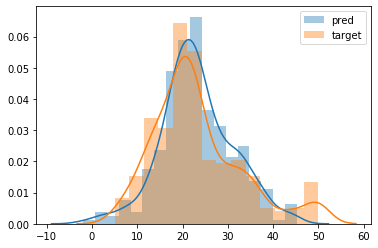

In [90]:
#the plot shows difference between distribution of
#real target variable and predicted target variable
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='target')
plt.legend()

In [91]:
#calculation of root mean squared error
#based on difference between distribution of
#real target variable and predicted target variable
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

5.838533879255301

Validating the Model

In [92]:
#create X_val matrix array
df_num = df_val[base]
X_val = df_num.values

In [93]:
#take the bias and the weights (w_0 and w), what we got from the linear regression
#and get the prediction of the target variable for the validation dataset
y_pred = w_0 + X_val.dot(w)

In [94]:
#compare y_pred with real target values 'y_val'
#that number should be used for comparing models
rmse(y_val, y_pred)

6.315378828176368

<b>prepare_X</b> function converts dataframe to matrix array

In [95]:
#this function takes in feature variables (base)，
#and returns a matrix array with 'values' method
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

In [96]:
#traub the model by calculating the weights
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

#apply model to validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

#compute RMSE on validation dataset
print('validation', rmse(y_val, y_pred))

validation 6.315378828176368


Feature engineering: Add more features to the model<br>
We use the validation framework to see whether more features improve the model

In [97]:
#use prepare_X function to add more features
def prepare_X(df):
    df = df.copy()
    base_02 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
    df_num = df[base_02]
    X = df_num.values
    return X

In [98]:
#check if adding 4 more numerical features can improve the model
#X_train should now be a matrix array with totally 12 numerical features
#train the model
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

#apply model to validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

#computer RMSE on validation dataset
print('validation:', rmse(y_val, y_pred))

validation: 5.114265782613434


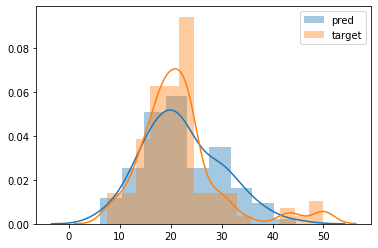

In [99]:
#above we can see that the RMSE decreased a bit
#plot distribution of real target values (target)
#and the predicted target values (pred)
#after we considered 12 feature variables
sns.distplot(y_pred, label='pred')
sns.distplot(y_val, label='target')
plt.legend()

Feature engineering: Add the CHAS feature to the model <br>
Actually it is a categorical variable, but it has only 2 values (0 and 1) <br>
So there is no need to do one-hot encoding <br>
We use the validation framework to see whether this additional feature improves the model

In [100]:
base_02 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']

#use prepare_X function to add CHAS as a feature
def prepare_X(df):
    df = df.copy()
    features = base_02.copy()
    features.append('CHAS')
    
    df_num = df[features]
    X = df_num.values
    return X

In [101]:
#check if adding 'CHAS' as a feature can improve the model
#X_train should now be a matrix array with totally 12 numerical features and 1 categorical feature
#train the model
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

#apply model to validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

#computer RMSE on validation dataset
print('validation:', rmse(y_val, y_pred))

validation: 5.028887217906398


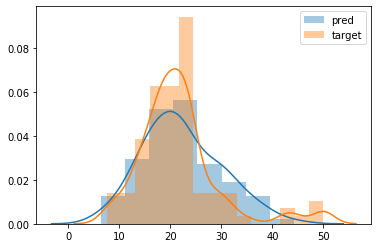

In [102]:
#above we can see that the RMSE decreased a bit
#compared to the plot above, the amount of predicted values for '30'
#gets closer to the amount of real values for '30'
#plot distribution of real target values (target)
#and the predicted target values (pred)
#after we considered 12 feature variables
sns.distplot(y_pred, label='pred')
sns.distplot(y_val, label='target')
plt.legend()

In [103]:
#we could try regularization in case the data is 'noisy'
#regularize with the parameter r
def linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    #add r to main diagonal of XTX
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

    

In [104]:
#the bigger r (alpha), the smaller the weights (the denominator becomes bigger)
#on the left 'column', you can see r, that growths with each step
#in the other columns, there are written the weights
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[3], w[5]))

    0, 33.95, -19.12, -0.01
0.001, 33.87, -19.07, -0.01
 0.01, 33.14, -18.65, -0.01
  0.1, 27.33, -15.22, -0.01
    1, 10.16, -5.17, -0.01
   10, 1.76, -0.43, -0.01


In [105]:
#calculate the RMSE after we used ridge regression
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred))

validation: 5.029289239043889


In [106]:
#run a grid search to identify the best value of r
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 5.028887619364775
0.0001 5.028927369382458
 0.001 5.029289239043889
  0.01 5.032953471039654
   0.1 5.071026300965349
     1 5.268606931564101
     5 5.3787614780926365
    10 5.389695101912931


as we can see from the new rmse, the ridge regression has no positive effect

Now we can help the user to predict the price of a real estate in Boston

In [107]:
df_test_incl_target.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18,23.9
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188,19.1,385.02,14.81,21.4
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0
81,0.04462,25.0,4.86,0,0.426,6.619,70.4,5.4007,4,281,19.0,395.63,7.22,23.9
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
324,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287,19.6,396.90,6.12,25.0
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2


In [108]:
#create a dictionary from rows 
#delete target value
pred_price_list = []
z = 0
while z < 10:
    ad = df_test_incl_target.iloc[z].to_dict()
    del ad['MEDV']
    #dt_test is a dataframe with one row (contains above dict info)
    df_test = pd.DataFrame([ad])
    X_test = prepare_X(df_test)
    #train model without ridge regression
    w_0, w = linear_regression(X_train, y_train)
    #prediction of the price
    y_pred = w_0 + X_test.dot(w)
    pred_price_list.append(y_pred)
    z = z + 1
    
pred_price_list

[array([20.59931035]),
 array([28.09755102]),
 array([18.55444248]),
 array([36.68639889]),
 array([23.94436145]),
 array([18.47690578]),
 array([27.47344736]),
 array([22.98264717]),
 array([25.61030899]),
 array([7.7838969])]

In [109]:
real_price = df_test_incl_target.MEDV.tolist()

In [110]:
#get average of difference between real price and predicted price
y = 0
diff_list = []
while y < 10:
    diff = real_price[y] - pred_price_list[y]
    diff_list.append(diff)
    y += 1

sum(diff_list) / len(diff_list)


array([-3.33092704])

later on, we can also try other models and see, if the rmse can be further reduced<br>
Lastly, I want to check how increased or decreaesed feature variables will influence the target variable

In [111]:
ad = df_test_incl_target.iloc[0].to_dict()
ad

{'CRIM': 0.22438000000000002,
 'ZN': 0.0,
 'INDUS': 9.69,
 'CHAS': 0.0,
 'NOX': 0.585,
 'RM': 6.027,
 'AGE': 79.7,
 'DIS': 2.4982,
 'RAD': 6.0,
 'TAX': 391.0,
 'PTRATIO': 19.2,
 'B': 396.9,
 'LSTAT': 14.33,
 'MEDV': 16.8}

In [112]:
ad_test = {'CRIM': 0.223,
 'ZN': 0,
 'INDUS': 9.69,
 'CHAS': 0,
 'NOX': 0.585,
 'RM': 6.025,
 'AGE': 79.9,
 'DIS': 2.4982,
 'RAD': 6.0,
 'TAX': 391.0,
 'PTRATIO': 19.2,
 'B': 396.9,
 'LSTAT': 14.33}

In [113]:
#dt_test is a dataframe with one row (contains above dict info)
df_test = pd.DataFrame([ad_test])
X_test = prepare_X(df_test)
#train model without ridge regression
w_0, w = linear_regression(X_train, y_train)
#prediction of the price
y_pred = w_0 + X_test.dot(w)
y_pred

array([20.58984062])

<b>Explanation of Features</b>
* CRIM: per capita crime rate per town (assumption: if CRIM high, target small --> correct)
* ZN: proportion of residential land zoned for lots over 25,000 sq. ft (assumption: if ZN high, target big --> correct)
* INDUS: proportion of non-retail business acres per town (assumption: if INDUS high, target small --> correct)
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (categorical! assumption: if 1, target high --> correct)
* NOX:  nitrogen oxides concentration (parts per 10 million) (assumption: if NOX high, target small --> correct)
* RM: average number of rooms per dwelling.(assumption: if RM high, target big --> correct)
* AGE: proportion of owner-occupied units built prior to 1940. (assumption: if AGE high, target big --> not clear)
* DIS: weighted mean of distances to five Boston employment centres. (assumption: if DIS high, target small --> correct)
* RAD: index of accessibility to radial highways. (assumption: if RAD high, target big --> correct)
* TAX: full-value property-tax rate per \$10,000. (assumption: if TAX high, target big --> not correct)
* PTRATIO: pupil-teacher ratio by town. (assumption: if PTRATIO high, target small--> correct)
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. (assumption: if B high, target small--> not correct)
* LSTAT: lower status of the population (percent). (assumption: if LSTAT high, target small --> correct)
* MEDV: median value of owner-occupied homes in \$1000s. (target)



In [114]:
#check the against test dataset to see if model works
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 5.028887217906398
test: 7.746497710561239
